Carga de datos

In [1]:
import pandas as pd

cloud="https://github.com/chorrillos/clustering/raw/main/variables.seleccionadas_21FEB.xlsx"
thedata=pd.read_excel(cloud)

In [2]:
thedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1874 entries, 0 to 1873
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   UBIGEO          1874 non-null   int64  
 1   DEPARTAMENTO    1874 non-null   object 
 2   PROVINCIA       1874 non-null   object 
 3   Distrito        1874 non-null   object 
 4   Zona            1874 non-null   object 
 5   Latitud         1874 non-null   float64
 6   Longitud        1874 non-null   float64
 7   cobertura.cell  1852 non-null   float64
 8   Educ.sec.comp   1874 non-null   float64
 9   esp.vid.nacer   1874 non-null   float64
 10  Ing.fam.p.cap   1874 non-null   float64
 11  NBS.2017        1874 non-null   float64
 12  No.Pobreza      1874 non-null   float64
 13  Tasa.docen_pub  1873 non-null   float64
dtypes: float64(9), int64(1), object(4)
memory usage: 205.1+ KB


In [ ]:
thedata.isnull().sum()

In [3]:
theVars=thedata.columns[7:] # variables a usar
thedata_sub=thedata.loc[:,theVars] # subset
thedata_sub

,cobertura.cell,Educ.sec.comp,esp.vid.nacer,Ing.fam.p.cap,NBS.2017,No.Pobreza,Tasa.docen_pub
0,87.500000,79.562705,72.192674,1259.130244,88.0,90.965375,200.541634
1,11.111111,71.006832,71.364553,561.102634,26.6,63.480051,138.888889
2,32.142857,32.772384,68.594405,415.021047,62.2,54.267038,188.564477
3,6.250000,52.210906,77.528252,398.663339,72.7,60.830218,287.648054
4,30.232558,36.868932,72.460151,325.930531,40.9,46.954338,101.892285
...,...,...,...,...,...,...,...
1869,18.840580,40.104714,80.048647,503.528398,40.8,87.100440,206.832872
1870,10.000000,40.397763,79.565489,459.209784,42.9,90.985455,251.228227
1871,20.689655,45.883427,82.510539,697.907476,39.3,88.053143,265.245708
1872,78.571429,43.119697,83.853720,662.652379,45.0,87.100440,136.268344


Imputación usando el algoritmo [MICE](https://www.scirp.org/journal/paperinformation.aspx?paperid=112455)

In [4]:
import miceforest as mf

# Crear kernel. 
kernel = mf.ImputationKernel(
            data=thedata_sub, # data con valores perdidos
            datasets=4,# en cuantas copias imputar
            save_all_iterations=True,
            random_state=1 # seed
)

# Usar el kernel, 5 iteraciones en cada dataset
kernel.mice(5)

In [ ]:
print(kernel)

In [5]:
thedata_sub_mice_mf = kernel.complete_data(dataset=0, inplace=False)
thedata_sub_mice_mf.columns=thedata_sub_mice_mf.columns+'_mf'
thedata_sub_mice_mf.describe()

,cobertura.cell_mf,Educ.sec.comp_mf,esp.vid.nacer_mf,Ing.fam.p.cap_mf,NBS.2017_mf,No.Pobreza_mf,Tasa.docen_pub_mf
count,1874.000000,1874.000000,1874.000000,1874.000000,1874.000000,1874.000000,1874.000000
mean,45.659178,55.769523,73.680183,588.785567,61.406670,65.857929,210.146912
std,30.292175,15.728123,5.229458,365.103757,18.297153,16.904808,97.843127
min,0.570613,11.974433,50.557694,51.073334,0.600000,18.738329,14.306152
25%,18.960182,44.466678,70.729725,306.545767,50.725000,53.234158,146.712682
50%,42.280607,57.164771,74.038561,499.073047,64.700000,65.700570,203.430403
75%,70.370370,68.202230,77.432747,804.306417,75.100000,79.092820,260.246819
max,100.000000,91.744878,85.000000,2037.326546,98.900000,99.942654,1123.595506


In [ ]:
kernel.plot_feature_importance(dataset=0, annot=True,cmap="YlGnBu",vmin=0, vmax=1)

In [6]:
import sys
import sklearn.neighbors._base
sys.modules['sklearn.neighbors.base'] = sklearn.neighbors._base
####
from fancyimpute import KNN
from fancyimpute import IterativeImputer
from missingpy import MissForest



knn_imputer = KNN()
mice_imputer = IterativeImputer()
imputerFOR = MissForest(criterion='squared_error')

thedata_sub_mice = mice_imputer.fit_transform(thedata_sub)
thedata_sub_knn = knn_imputer.fit_transform(thedata_sub)
thedata_sub_for = imputerFOR.fit_transform(thedata_sub)

thedata_sub_mice=pd.DataFrame(thedata_sub_mice, columns=theVars+'_mice')
thedata_sub_knn=pd.DataFrame(thedata_sub_knn, columns=theVars+'_knn')
thedata_sub_for=pd.DataFrame(thedata_sub_for, columns=theVars+'_for')

Imputing row 1/1874 with 0 missing, elapsed time: 0.476
Imputing row 101/1874 with 0 missing, elapsed time: 0.477
Imputing row 201/1874 with 0 missing, elapsed time: 0.477
Imputing row 301/1874 with 0 missing, elapsed time: 0.478
Imputing row 401/1874 with 0 missing, elapsed time: 0.478
Imputing row 501/1874 with 0 missing, elapsed time: 0.479
Imputing row 601/1874 with 0 missing, elapsed time: 0.479
Imputing row 701/1874 with 0 missing, elapsed time: 0.479
Imputing row 801/1874 with 0 missing, elapsed time: 0.480
Imputing row 901/1874 with 0 missing, elapsed time: 0.480
Imputing row 1001/1874 with 0 missing, elapsed time: 0.481
Imputing row 1101/1874 with 0 missing, elapsed time: 0.481
Imputing row 1201/1874 with 0 missing, elapsed time: 0.481
Imputing row 1301/1874 with 0 missing, elapsed time: 0.482
Imputing row 1401/1874 with 0 missing, elapsed time: 0.482
Imputing row 1501/1874 with 0 missing, elapsed time: 0.483
Imputing row 1601/1874 with 0 missing, elapsed time: 0.483
Imputing 

In [7]:
AllData=pd.concat([thedata_sub,thedata_sub_mice,thedata_sub_knn,thedata_sub_for,thedata_sub_mice_mf],axis=1)

In [8]:
select=AllData.columns[AllData.columns.str.contains("cober|docen")]
select=sorted(select)
select

['Tasa.docen_pub',
 'Tasa.docen_pub_for',
 'Tasa.docen_pub_knn',
 'Tasa.docen_pub_mf',
 'Tasa.docen_pub_mice',
 'cobertura.cell',
 'cobertura.cell_for',
 'cobertura.cell_knn',
 'cobertura.cell_mf',
 'cobertura.cell_mice']

In [9]:
AllData[select].describe()

,Tasa.docen_pub,Tasa.docen_pub_for,Tasa.docen_pub_knn,Tasa.docen_pub_mf,Tasa.docen_pub_mice,cobertura.cell,cobertura.cell_for,cobertura.cell_knn,cobertura.cell_mf,cobertura.cell_mice
count,1873.000000,1874.000000,1874.000000,1874.000000,1874.000000,1852.000000,1874.000000,1874.000000,1874.000000,1874.000000
mean,210.196649,210.144386,210.135573,210.146912,210.146786,45.940745,45.714633,45.704869,45.659178,45.703117
std,97.845558,97.845594,97.855159,97.843127,97.843248,30.289883,30.215319,30.208732,30.292175,30.237367
min,14.306152,14.306152,14.306152,14.306152,14.306152,0.570613,0.570613,0.570613,0.570613,-6.524194
25%,147.040693,146.712682,146.712682,146.712682,146.712682,19.593254,19.394604,19.494048,18.960182,19.360627
50%,203.470975,203.430403,203.430403,203.430403,203.430403,42.802617,42.201141,42.105263,42.280607,42.201141
75%,260.290557,260.246819,260.246819,260.246819,260.246819,70.649510,70.370370,70.370370,70.370370,70.370370
max,1123.595506,1123.595506,1123.595506,1123.595506,1123.595506,100.000000,100.000000,100.000000,100.000000,100.000000


In [10]:
AllData_imp=AllData.loc[:,select]
AllData_imp

,Tasa.docen_pub,Tasa.docen_pub_for,Tasa.docen_pub_knn,Tasa.docen_pub_mf,Tasa.docen_pub_mice,cobertura.cell,cobertura.cell_for,cobertura.cell_knn,cobertura.cell_mf,cobertura.cell_mice
0,200.541634,200.541634,200.541634,200.541634,200.541634,87.500000,87.500000,87.500000,87.500000,87.500000
1,138.888889,138.888889,138.888889,138.888889,138.888889,11.111111,11.111111,11.111111,11.111111,11.111111
2,188.564477,188.564477,188.564477,188.564477,188.564477,32.142857,32.142857,32.142857,32.142857,32.142857
3,287.648054,287.648054,287.648054,287.648054,287.648054,6.250000,6.250000,6.250000,6.250000,6.250000
4,101.892285,101.892285,101.892285,101.892285,101.892285,30.232558,30.232558,30.232558,30.232558,30.232558
...,...,...,...,...,...,...,...,...,...,...
1869,206.832872,206.832872,206.832872,206.832872,206.832872,18.840580,18.840580,18.840580,18.840580,18.840580
1870,251.228227,251.228227,251.228227,251.228227,251.228227,10.000000,10.000000,10.000000,10.000000,10.000000
1871,265.245708,265.245708,265.245708,265.245708,265.245708,20.689655,20.689655,20.689655,20.689655,20.689655
1872,136.268344,136.268344,136.268344,136.268344,136.268344,78.571429,78.571429,78.571429,78.571429,78.571429


In [11]:
AllData_imp.loc[AllData_imp.isnull().any(axis=1),].reset_index(drop=True)

,Tasa.docen_pub,Tasa.docen_pub_for,Tasa.docen_pub_knn,Tasa.docen_pub_mf,Tasa.docen_pub_mice,cobertura.cell,cobertura.cell_for,cobertura.cell_knn,cobertura.cell_mf,cobertura.cell_mice
0,110.192837,110.192837,110.192837,110.192837,110.192837,NaN,24.834175,35.018296,40.157480,21.490259
1,283.790284,283.790284,283.790284,283.790284,283.790284,NaN,13.123130,24.584515,19.718310,14.908923
2,95.011876,95.011876,95.011876,95.011876,95.011876,NaN,60.059612,30.473675,48.648649,52.512707
3,276.422764,276.422764,276.422764,276.422764,276.422764,NaN,40.593691,37.809544,37.500000,33.400419
4,50.000000,50.000000,50.000000,50.000000,50.000000,NaN,28.959859,45.344336,8.928571,49.055947
5,186.958504,186.958504,186.958504,186.958504,186.958504,NaN,34.466647,37.591677,40.000000,41.465580
6,410.094637,410.094637,410.094637,410.094637,410.094637,NaN,20.543313,22.545562,25.748503,30.887149
7,323.799244,323.799244,323.799244,323.799244,323.799244,NaN,28.790022,20.269069,2.816901,35.934287
8,273.269524,273.269524,273.269524,273.269524,273.269524,NaN,42.665942,27.888297,46.666667,37.188020
9,143.833154,143.833154,143.833154,143.833154,143.833154,NaN,34.355380,32.691031,14.285714,44.179362


array([[<AxesSubplot:title={'center':'Tasa.docen_pub'}>,
        <AxesSubplot:title={'center':'Tasa.docen_pub_for'}>,
        <AxesSubplot:title={'center':'Tasa.docen_pub_knn'}>,
        <AxesSubplot:title={'center':'Tasa.docen_pub_mf'}>,
        <AxesSubplot:title={'center':'Tasa.docen_pub_mice'}>],
       [<AxesSubplot:title={'center':'cobertura.cell'}>,
        <AxesSubplot:title={'center':'cobertura.cell_for'}>,
        <AxesSubplot:title={'center':'cobertura.cell_knn'}>,
        <AxesSubplot:title={'center':'cobertura.cell_mf'}>,
        <AxesSubplot:title={'center':'cobertura.cell_mice'}>]],
      dtype=object)

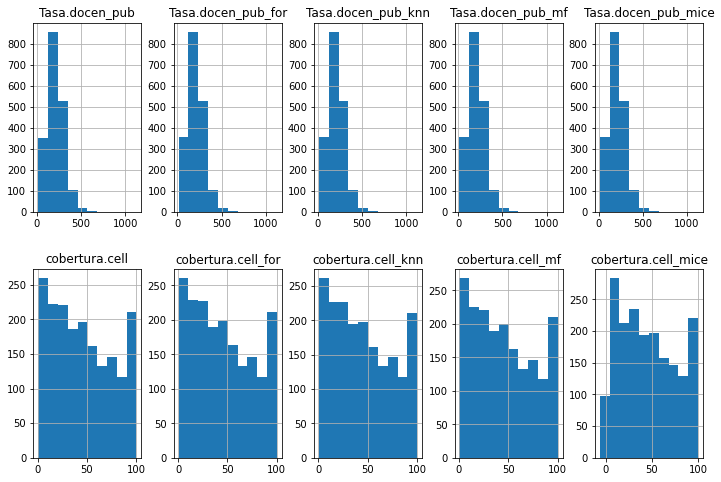

In [12]:
AllData_imp.hist(layout=[2,5],figsize=(12,8))

<AxesSubplot:>

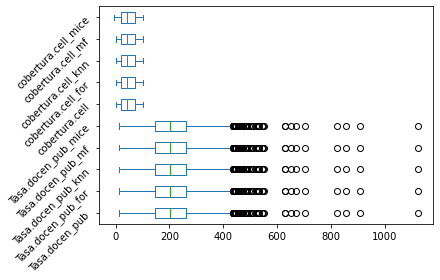

In [13]:
AllData_imp.plot(kind='box',rot=45,vert=False)

In [17]:
toAdd=AllData.columns[AllData.columns.str.contains("cell_mf|pub_mf")]
pd.concat([thedata,AllData.loc[:,toAdd]])

,UBIGEO,DEPARTAMENTO,PROVINCIA,Distrito,Zona,Latitud,Longitud,cobertura.cell,Educ.sec.comp,esp.vid.nacer,Ing.fam.p.cap,NBS.2017,No.Pobreza,Tasa.docen_pub,cobertura.cell_mf,Tasa.docen_pub_mf
0,10101.0,AMAZONAS,CHACHAPOYAS,CHACHAPOYAS,X,-6.2294,-77.8714,87.500000,79.562705,72.192674,1259.130244,88.0,90.965375,200.541634,NaN,NaN
1,10102.0,AMAZONAS,CHACHAPOYAS,ASUNCION,X,-6.0317,-77.7122,11.111111,71.006832,71.364553,561.102634,26.6,63.480051,138.888889,NaN,NaN
2,10103.0,AMAZONAS,CHACHAPOYAS,BALSAS,X,-6.8375,-78.0214,32.142857,32.772384,68.594405,415.021047,62.2,54.267038,188.564477,NaN,NaN
3,10104.0,AMAZONAS,CHACHAPOYAS,CHETO,X,-6.2558,-77.7003,6.250000,52.210906,77.528252,398.663339,72.7,60.830218,287.648054,NaN,NaN
4,10105.0,AMAZONAS,CHACHAPOYAS,CHILIQUIN,X,-6.0778,-77.7392,30.232558,36.868932,72.460151,325.930531,40.9,46.954338,101.892285,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1869,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.840580,206.832872
1870,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.000000,251.228227
1871,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.689655,265.245708
1872,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78.571429,136.268344
